In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn
import numpy as np
import seaborn as sns
import math as m
from scipy.stats import levy

In [2]:
rn.seed(7)

### (a) Random graph

In [3]:
def random_graph(n, p):
    """Returns a random graph according to the Erdos Renyi Model.
    Create an empty graph, add fixed n nodes to it and add edges 
    to the graph randomly according to fixed probability p.
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    p : int
        The value of probablity
  
    Returns 
    -------
    G : Graph 

    """
    
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)]) 
    
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = rn.random()
                
                if r <= p:
                    G.add_edge(i, j)
                else:
                    continue
    return G

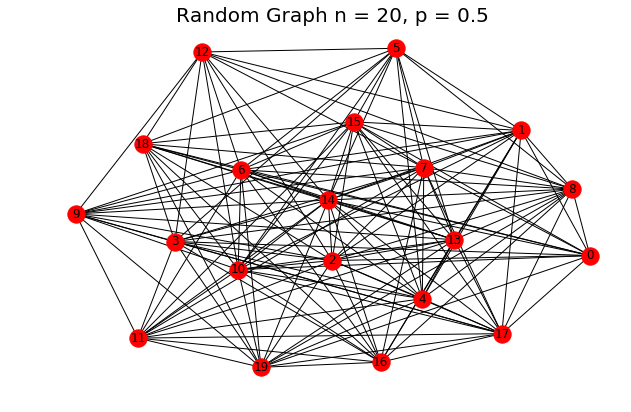

In [64]:
R = random_graph(20, 0.5)
plt.figure(figsize = (8, 5))
nx.draw(R, with_labels = True)
plt.title('Random Graph n = 20, p = 0.5', fontsize = 20)
plt.show()

In [5]:
def fun(G):
    """ Function for input graph G reports the number of vertices and edges, 
    computes the average degree and the variance of the degree distribution
    and generates the frequency plot for the degrees of the nodes.
    """
    
    list_of_nodes=list(G.nodes())
    list_of_edges=list(G.edges())
    print("Graph has {} nodes and {} edges".format(len(list_of_nodes), len(list_of_edges)))
    
    list_of_deegres = nx.degree(G)
    x = list(dict(list_of_deegres).values())
    mu = round(np.mean(x), 2)
    print("Average degree in graph is equal to {}".format(mu))
    var = round(np.var(x), 2)
    print("Variance of degree distribution in graph is equal to {}".format(var))
    
    plt.figure(figsize = (9, 5))
    sns.distplot(x, hist = True)
    plt.title("Distribution of nodes degrees in graph", fontsize = 20)
    plt.show()
    return mu, var, x

In [6]:
R = random_graph(2000, 0.5)
# saving simulated data into an adjlist file
nx.write_adjlist(R, "R.adjlist")

In [ ]:
# from now we are going to work on data from the file
fh = open("R.adjlist", 'rb')
test_R = nx.read_adjlist(fh)

Graph has 2000 nodes and 1499346 edges
Average degree in graph is equal to 1499.35
Variance of degree distribution in graph is equal to 362.73


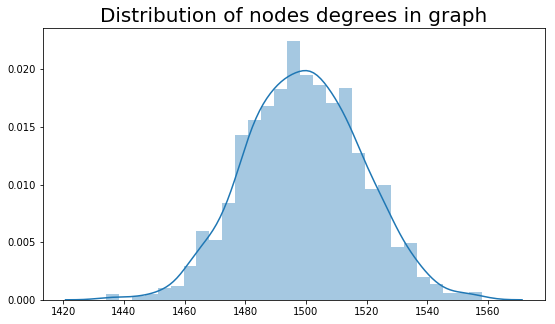

In [38]:
output_R = fun(test_R)

In mathematics, random graph is the general term to refer to probability distributions over graphs. Random graphs may be described simply by a probability distribution, or by a random process which generates them. The theory of random graphs lies at the intersection between graph theory and probability theory.

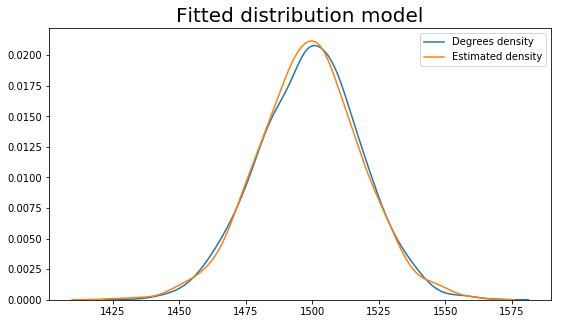

In [31]:
# fitting normal distribution with estimated parameters

s = np.random.normal(output_R[0], m.sqrt(output_R[1]), 1000)
plt.figure(figsize = (9, 5))
sns.distplot(output_R[2], hist = False, label = "Degrees density")
sns.distplot(s, hist = False, label = "Estimated density")
plt.title("Fitted distribution model", fontsize = 20)
plt.legend()
plt.show()

### (b) Watts-Strogatz model

The following graph model reproduces correctly the small world characteristics of real networks. In a small-world network most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached from every other node by a small number of hops or steps.

In [57]:
def watts_strogatz_graph(n, p, k):
    """Returns a random graph according to the Watts Strogatz Model.
    Model starts with a regular graph and rewires its edges randomly 
    to produce graphs with small-world properties.
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    p : int
        The value of probablity
    k : int
        An even integer, number of nearest neightbours of each node in regular graph. 
  
    Returns 
    -------
    G : Graph 

    """
    
    k = k + 1
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)])       
    
    for i in G.nodes:
        for j in G.nodes:
            if (0 < abs(i - j) % (n - k / 2)) and (abs(i - j) % (n - k / 2) <= k / 2):
                 G.add_edge(i, j)
    
    for n in G.nodes:
        for l in list(G.neighbors(n)):
            r = rn.random()
            if r > p:
                list_of_nodes = list(G.nodes())
                list_of_nodes.remove(n)
                for d in list(G.neighbors(n)):
                    list_of_nodes.remove(d)
                        
                m = rn.choice(list_of_nodes)
                G.remove_edge(n, l)
                G.add_edge(n, m)
    return G

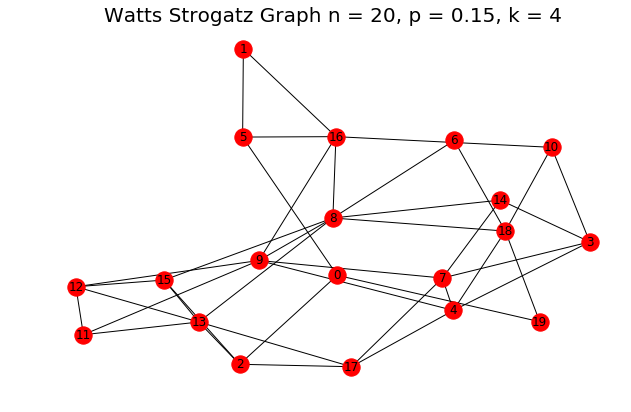

In [60]:
W = watts_strogatz_graph(20, 0.15, 4)
plt.figure(figsize = (8, 5))
nx.draw(W, with_labels = True)
plt.title('Watts Strogatz Graph n = 20, p = 0.15, k = 4', fontsize = 20)
plt.show()

In [39]:
W = watts_strogatz_graph(2000, 0.2, 10)
nx.write_adjlist(W, "W.adjlist")

In [ ]:
fh = open("W.adjlist", 'rb')
test_W = nx.read_adjlist(fh)

Graph has 2000 nodes and 10000 edges
Average degree in graph is equal to 10.0
Variance of degree distribution in graph is equal to 9.78


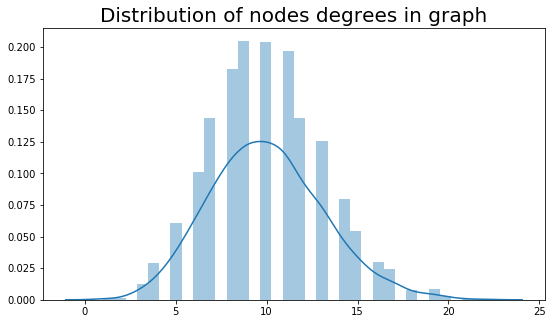

In [40]:
output_W = fun(test_W)

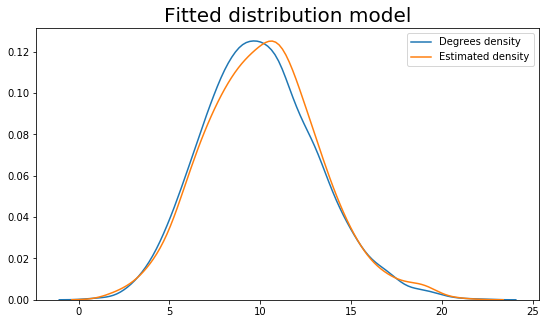

In [41]:
# fitting poisson distribution with estimated parameter lambda
s = np.random.poisson(output_W[0], 1000)
plt.figure(figsize = (9, 5))
sns.distplot(output_W[2], hist = False, label = "Degrees density")
sns.distplot(s, hist = False, label = "Estimated density")
plt.title("Fitted distribution model", fontsize = 20)
plt.legend()
plt.show()

### (c) Barabasi-Albert model

Both previous models do not provide reasonable degree distributions in comparison to real networks. What is crucial in the model is "preferential attachement" - in many real networks new nodes prefer to link to the more connected
nodes.

In [47]:

def barabasi_albert_graph(n, m, m0):
    """Returns a random graph according to the Barabasi Albert Model.
    A graph of n nodes is grown by attaching new nodes each with m edges 
    that are preferentially attached to existing nodes with high degree. 
  
    Parameters 
    ----------
    n : int
        Total number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    m0 : int
        The number of staring m0 nodes, m0 > m
  
    Returns 
    -------
    G : Graph 

    """

    G = nx.complete_graph(m0)
    
    for i in range(m0 + 1, n+1):
        G.add_node(i)
        deg = nx.degree(G) 
        num_edges_added = 0
        target_nodes = [i]
        
        while(num_edges_added < m):
            p = rn.random()
            j = rn.choice(list(G.nodes()))
            if j not in target_nodes:
        
                if p <= G.degree(j) / sum(dict(deg).values()):
                    G.add_edge(i, j)
                    num_edges_added += 1
                    
                    target_nodes.append(j)
                
            else: 
                continue
            
                 
    return G

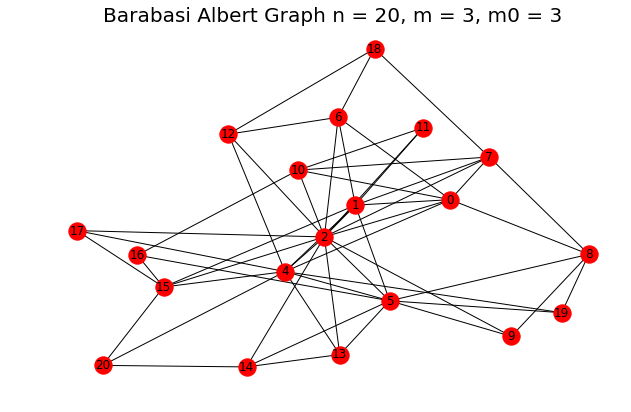

In [59]:
B = barabasi_albert_graph(20, 3, 3)
plt.figure(figsize = (8, 5))
nx.draw(B, with_labels = True)
plt.title('Barabasi Albert Graph n = 20, m = 3, m0 = 3', fontsize = 20)
plt.show()

In [49]:
B = barabasi_albert_graph(2000, 3, 3)
nx.write_adjlist(B, "B.adjlist")

In [50]:
fh = open("B.adjlist", 'rb')
test_B = nx.read_adjlist(fh)

Graph has 2000 nodes and 5994 edges
Average degree in graph is equal to 5.99
Variance of degree distribution in graph is equal to 54.53


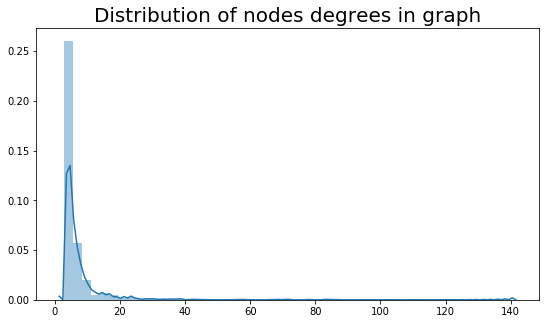

In [51]:
output_B = fun(B)

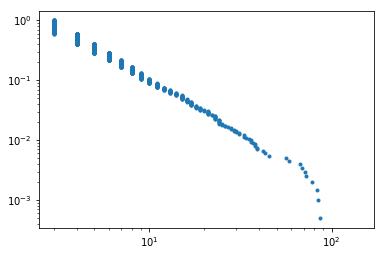

In [62]:
# tail of degrees distribution of Barabasi Albert Graph in log log scale
x = np.sort(output_B[2])
y = np.arange(1,len(x)+1)/len(x)
y = 1 - y
plt.loglog(x,y, marker = '.', linestyle = 'none')
plt.show()

Networks are omnipresent. They appear naturally as models of communication networks, networks of friends, in the communication of infection, rumors or information, as models of atoms and bonds between them in chemistry and elsewhere. Mathematically the concept is captured in a graph. So generally this is why we need presented graphs models to be able to model reality phenomena.

An interesting quote appiring in Erdos and Renyi work would be suitable ending 

"It seems to us worthwhile to consider besides graphs also more complex structures from the same point of view, i.e.
to investigate the laws governing their evolution in a similar spirit. This may be interesting not only from a purely
mathematical point of view. In fact, the evolution of graphs can be seen as a rather simplified model of the evolution
of certain communication nets..."